 
# Visualizing a single network

[Open interactive notebook in Binder](https://mybinder.org/v2/gh/wiheto/netplotbrain/main?filepath=docs/gallery/plot_dmn.ipynb)

## Goal
Here we are going to take a atlas from templateflow and only visualize the default mode network


In [1]:
# Import packages
import templateflow.api as tf
import netplotbrain
import pandas as pd

In [2]:
# Get template information
template = 'MNI152NLin2009cAsym'
atlas = 'Schaefer2018'
atlas_desc = '400Parcels7Networks'

In [3]:
# Get and load the tsv file
atlas_path = tf.get(atlas=atlas,
                    template=template, 
                    desc=atlas_desc, 
                    extension='.tsv')
atlas_df = pd.read_csv(atlas_path, sep='\t')
atlas_df.head()

,index,name,color
0,1,7Networks_LH_Vis_1,#781180
1,2,7Networks_LH_Vis_2,#781181
2,3,7Networks_LH_Vis_3,#781182
3,4,7Networks_LH_Vis_4,#781183
4,5,7Networks_LH_Vis_5,#781184


In [4]:
# Now we need to make a colour argument for the DMN nodes only
# Get which rows are in the default mode network
atlas_df['defaultmode'] = atlas_df['name'].str.contains('Default')
# Set the color column of non DMN nodes to same colour
# Not really necessary cause we make these nods transparant below
atlas_df.loc[~atlas_df['defaultmode'], 'color'] = 'white'

(<Figure size 648x252 with 4 Axes>,
 [<Axes3D: title={'center': 'Left'}>,
  <Axes3D: title={'center': 'Right'}>,
  <Axes3D: title={'center': 'Superior'}>,
  <Axes: >])

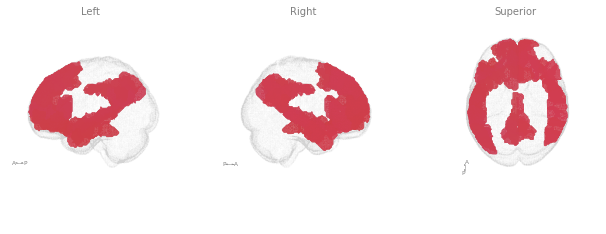

In [5]:
# now plot
netplotbrain.plot(template=template,
                  nodes={
                      'atlas': atlas,
                      'desc': atlas_desc,
                      'resolution': 1},
                  view='preset-3',
                  nodes_df = atlas_df,
                  node_color='color',
                  node_type='parcels',
                  highlight_nodes='defaultmode',
                  highlight_level=1)